In [2]:
import bagpy
from bagpy import bagreader
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import numpy as np
from geopy.distance import geodesic

imu_reader = bagreader('../data/imu_data_2024-02-29-19-41-47.bag')

[INFO]  Data folder ../data/imu_data_2024-02-29-19-41-47 already exists. Not creating.


In [3]:
imu_reader.topic_table

,Topics,Types,Message Count,Frequency
0,/imu,vn_driver/Vectornav,23941,23.430361


In [4]:
#extracting the data for specific topic name only and converting to csv
imu_reader_msg = imu_reader.message_by_topic('/imu')

In [5]:
#Extracting the data from into a pandas data frame
imu_data = pd.read_csv(imu_reader_msg)
imu_data.head()

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,imu.header.seq,imu.header.stamp.secs,imu.header.stamp.nsecs,imu.header.frame_id,imu.orientation.x,...,imu.linear_acceleration_covariance,mag_field.header.seq,mag_field.header.stamp.secs,mag_field.header.stamp.nsecs,mag_field.header.frame_id,mag_field.magnetic_field.x,mag_field.magnetic_field.y,mag_field.magnetic_field.z,mag_field.magnetic_field_covariance,imu_read
0,1.709254e+09,1,1709253707,349041938,imu1_frame,1,1709253707,349041938,imu1_frame,0.462754,...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",1,1709253707,349041938,imu1_frame,0.000021,0.000048,0.000012,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","$VNYMR,-063.304,-004.475,+022.885,+00.2098,+00..."
1,1.709254e+09,2,1709253707,373252391,imu1_frame,2,1709253707,373252391,imu1_frame,0.461150,...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",2,1709253707,373252391,imu1_frame,0.000021,0.000048,0.000012,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","$VNYMR,-063.304,-004.473,+022.889,+00.2067,+00..."
2,1.709254e+09,3,1709253707,398184776,imu1_frame,3,1709253707,398184776,imu1_frame,0.460774,...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",3,1709253707,398184776,imu1_frame,0.000021,0.000048,0.000012,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","$VNYMR,-063.304,-004.472,+022.889,+00.2087,+00..."
3,1.709254e+09,4,1709253707,423222064,imu1_frame,4,1709253707,423222064,imu1_frame,0.460723,...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",4,1709253707,423222064,imu1_frame,0.000021,0.000048,0.000012,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","$VNYMR,-063.304,-004.473,+022.891,+00.2067,+00..."
4,1.709254e+09,5,1709253707,448669195,imu1_frame,5,1709253707,448669195,imu1_frame,0.461739,...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",5,1709253707,448669195,imu1_frame,0.000021,0.000048,0.000012,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","$VNYMR,-063.304,-004.474,+022.888,+00.2077,+00..."


In [6]:
imu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23941 entries, 0 to 23940
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Time                                 23941 non-null  float64
 1   header.seq                           23941 non-null  int64  
 2   header.stamp.secs                    23941 non-null  int64  
 3   header.stamp.nsecs                   23941 non-null  int64  
 4   header.frame_id                      23941 non-null  object 
 5   imu.header.seq                       23941 non-null  int64  
 6   imu.header.stamp.secs                23941 non-null  int64  
 7   imu.header.stamp.nsecs               23941 non-null  int64  
 8   imu.header.frame_id                  23941 non-null  object 
 9   imu.orientation.x                    23941 non-null  float64
 10  imu.orientation.y                    23941 non-null  float64
 11  imu.orientation.z           

### Converting the angular velocity or Rotational rate from radian/sec to deg/sec

In [7]:
rotational_rate_deg = np.degrees(imu_data[['imu.angular_velocity.x', 'imu.angular_velocity.y', 'imu.angular_velocity.z']])
rotational_rate_deg.head()

,imu.angular_velocity.x,imu.angular_velocity.y,imu.angular_velocity.z
0,0.026413,0.038388,0.076490
1,0.160027,0.038847,-0.000344
2,-0.114706,-0.048530,0.026814
3,0.057067,-0.039248,0.139000
4,-0.069156,-0.031914,-0.058041


### Rotational rate from the gyro in degrees/s on axes x,y,z. 

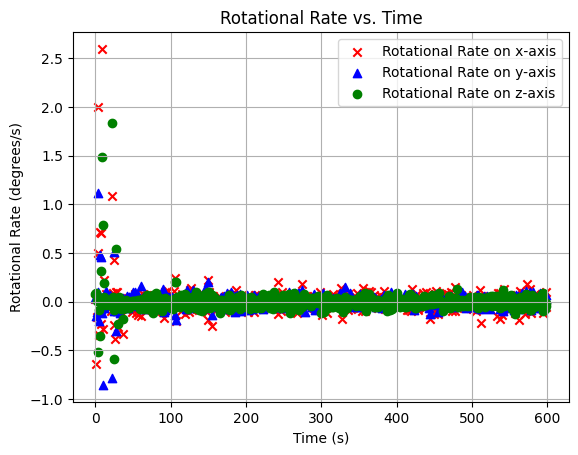

In [8]:
from scipy.interpolate import interp1d

#creating an array for time in seconds for recorded data for ten minutes (600s)
timeStamp = np.arange(0,600,1)

# Interpolating the Rotational rate for all three axes data to match the length of the timestamp array
interp_func_x = interp1d(np.arange(len(rotational_rate_deg['imu.angular_velocity.x'])), rotational_rate_deg['imu.angular_velocity.x'], kind='linear')
interp_func_y = interp1d(np.arange(len(rotational_rate_deg['imu.angular_velocity.y'])), rotational_rate_deg['imu.angular_velocity.y'], kind='linear')
interp_func_z = interp1d(np.arange(len(rotational_rate_deg['imu.angular_velocity.z'])), rotational_rate_deg['imu.angular_velocity.z'], kind='linear')

# Interpolating the y-axis data to match the length of the timestamp array
rotational_rate_interp_x = interp_func_x(np.linspace(0, len(rotational_rate_deg['imu.angular_velocity.x']) - 1, num=len(timeStamp)))
rotational_rate_interp_y = interp_func_y(np.linspace(0, len(rotational_rate_deg['imu.angular_velocity.y']) - 1, num=len(timeStamp)))
rotational_rate_interp_z = interp_func_z(np.linspace(0, len(rotational_rate_deg['imu.angular_velocity.z']) - 1, num=len(timeStamp)))

#plotting for x axis 
plt.scatter(timeStamp, rotational_rate_interp_x, label='Rotational Rate on x-axis', color='red', marker='x')
plt.scatter(timeStamp, rotational_rate_interp_y, label='Rotational Rate on y-axis', color='blue', marker='^')
plt.scatter(timeStamp, rotational_rate_interp_z, label='Rotational Rate on z-axis', color='green', marker='o')

plt.xlabel('Time (s)')
plt.ylabel('Rotational Rate (degrees/s)')
plt.title('Rotational Rate vs. Time')

plt.legend()
plt.grid(True)
plt.savefig('RoationalRate_time.png')
plt.show()

### Acceleration from the accelerometer in m/s^2 on axes x,y,z

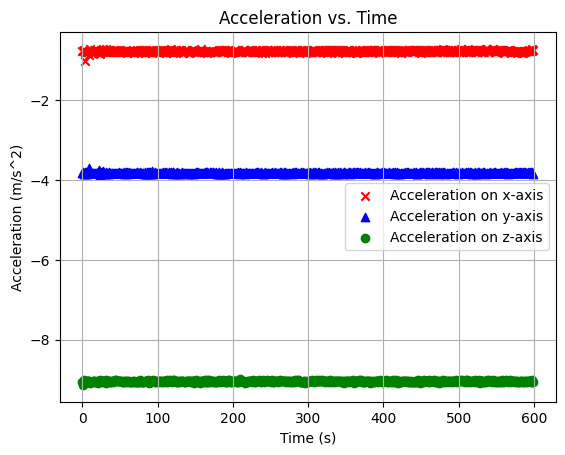

In [9]:
# Interpolating the Rotational rate for all three axes data to match the length of the timestamp array
interp_func_accel_x = interp1d(np.arange(len(imu_data['imu.linear_acceleration.x'])), imu_data['imu.linear_acceleration.x'], kind='linear')
interp_func_accel_y = interp1d(np.arange(len(imu_data['imu.linear_acceleration.y'])), imu_data['imu.linear_acceleration.y'], kind='linear')
interp_func_accel_z = interp1d(np.arange(len(imu_data['imu.linear_acceleration.z'])), imu_data['imu.linear_acceleration.z'], kind='linear')

# Interpolating the y-axis data to match the length of the timestamp array
acceleration_interp_x = interp_func_accel_x(np.linspace(0, len(imu_data['imu.linear_acceleration.x']) - 1, num=len(timeStamp)))
acceleration_interp_y = interp_func_accel_y(np.linspace(0, len(imu_data['imu.linear_acceleration.y']) - 1, num=len(timeStamp)))
acceleration_interp_z = interp_func_accel_z(np.linspace(0, len(imu_data['imu.linear_acceleration.z']) - 1, num=len(timeStamp)))

#plotting for x axis 
plt.scatter(timeStamp, acceleration_interp_x, label='Acceleration on x-axis', color='red', marker='x')
plt.scatter(timeStamp, acceleration_interp_y, label='Acceleration on y-axis', color='blue', marker='^')
plt.scatter(timeStamp, acceleration_interp_z, label='Acceleration on z-axis', color='green', marker='o')

plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration vs. Time')

plt.legend()
plt.grid(True)
plt.savefig('Acceleration_time.png')
plt.show()

### Rotation from VN estimation in degrees on axes x,y,z.

In [22]:
quaternion_data = imu_data[['imu.orientation.x','imu.orientation.y','imu.orientation.z','imu.orientation.w']]
quaternion_data.head()

,imu.orientation.x,imu.orientation.y,imu.orientation.z,imu.orientation.w
0,0.462754,-0.460656,-0.626510,-0.425606
1,0.461150,-0.462003,-0.626209,-0.426329
2,0.460774,-0.462050,-0.626519,-0.426228
3,0.460723,-0.462629,-0.625746,-0.426790
4,0.461739,-0.461642,-0.626129,-0.426199


In [19]:
import transformations as tf

In [28]:
#functions to convert quaternions to Euler angles using tf library
def quaternion_to_euler(row):
    quaternion = (row['imu.orientation.x'],row['imu.orientation.y'],row['imu.orientation.z'],row['imu.orientation.w'])
    euler = tf.euler_from_quaternion(quaternion)
    euler_degrees = np.degrees(euler)
    return pd.Series({'roll': euler_degrees[0], 'pitch': euler_degrees[1], 'yaw': euler_degrees[2]})

rotation_df = quaternion_data.apply(quaternion_to_euler, axis=1)

rotation_df.head()


,roll,pitch,yaw
0,152.947976,-76.398614,128.786083
1,152.947975,-76.284022,128.556902
2,152.947973,-76.226725,128.556903
3,152.947975,-76.284022,128.442310
4,152.947972,-76.341317,128.614200


In [29]:
rotation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23941 entries, 0 to 23940
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   roll    23941 non-null  float64
 1   pitch   23941 non-null  float64
 2   yaw     23941 non-null  float64
dtypes: float64(3)
memory usage: 561.2 KB


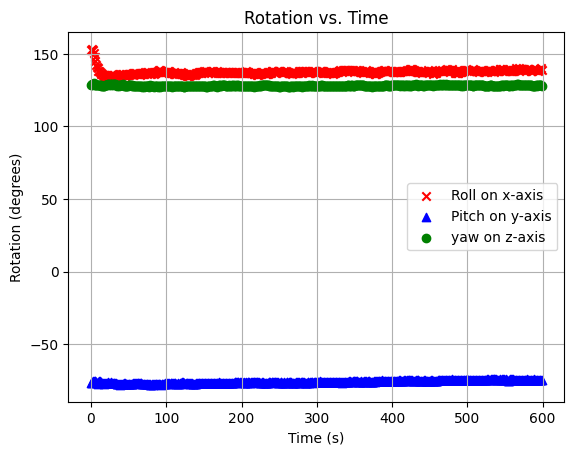

In [30]:
# Interpolating the Rotational rate for all three axes data to match the length of the timestamp array
interp_func_rotation_x = interp1d(np.arange(len(rotation_df['roll'])), rotation_df['roll'], kind='linear')
interp_func_rotation_y = interp1d(np.arange(len(rotation_df['pitch'])), rotation_df['pitch'], kind='linear')
interp_func_rotation_z = interp1d(np.arange(len(rotation_df['yaw'])), rotation_df['yaw'], kind='linear')

# Interpolating the y-axis data to match the length of the timestamp array
rotation_interp_x = interp_func_rotation_x(np.linspace(0, len(rotation_df['roll']) - 1, num=len(timeStamp)))
rotation_interp_y = interp_func_rotation_y(np.linspace(0, len(rotation_df['pitch']) - 1, num=len(timeStamp)))
rotation_interp_z = interp_func_rotation_z(np.linspace(0, len(rotation_df['yaw']) - 1, num=len(timeStamp)))

#plotting for x axis 
plt.scatter(timeStamp, rotation_interp_x, label='Roll on x-axis', color='red', marker='x')
plt.scatter(timeStamp, rotation_interp_y, label='Pitch on y-axis', color='blue', marker='^')
plt.scatter(timeStamp, rotation_interp_z, label='yaw on z-axis', color='green', marker='o')

plt.xlabel('Time (s)')
plt.ylabel('Rotation (degrees)')
plt.title('Rotation vs. Time')

plt.legend()
plt.grid(True)
plt.savefig('Rotation_time.png')
plt.show()

### Three 1D histograms of rotation in x,y,z axes.

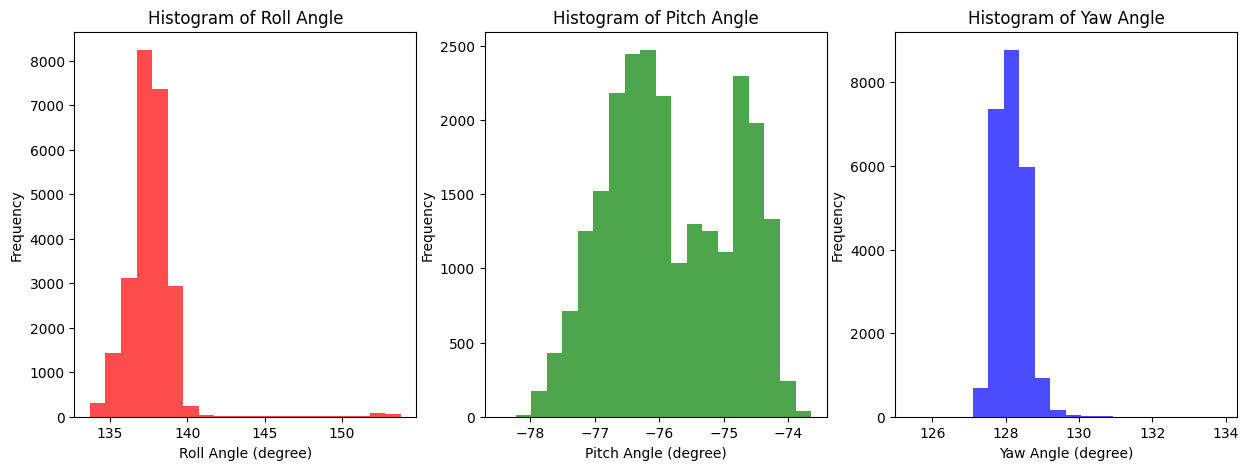

In [34]:
plt.figure(figsize=(15, 5))

# Histogram for roll
plt.subplot(1, 3, 1)
plt.hist(rotation_df['roll'], bins=20, color='red', alpha=0.7)
plt.xlabel('Roll Angle (degree)')
plt.ylabel('Frequency')
plt.title('Histogram of Roll Angle')

# Histogram for pitch
plt.subplot(1, 3, 2)
plt.hist(rotation_df['pitch'], bins=20, color='green', alpha=0.7)
plt.xlabel('Pitch Angle (degree)')
plt.ylabel('Frequency')
plt.title('Histogram of Pitch Angle')

# Histogram for yaw
plt.subplot(1, 3, 3)
plt.hist(rotation_df['yaw'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Yaw Angle (degree)')
plt.ylabel('Frequency')
plt.title('Histogram of Yaw Angle')

plt.savefig('Rotation_histograms.png')
plt.show()